# The Big DataCombine Engineered by BattleFin

The document
https://docs.google.com/document/d/1KYKqg6J2ceiOQDV35wSuBat0nnKbt-qG8fKTWzXEKHA/edit#heading=h.xhjdvy1vjbfl

### Load Library

In [1]:
import csv
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot

### Load Data

In [2]:
# load train data
train = list()
for x in range(1, 201):
    day = list()
    with open("data/%d.csv" % x) as file:
        reader = csv.reader(file, delimiter=",")
        next(reader)
        for row in reader:
            day.append(np.array(list(map(float, row))))
    day = np.vstack(day)
    train.append(day)

pickle.dump(train, open("output/train.pkl", "wb"))    

print("train[0] shape - {}".format(train[0].shape))

train[0] shape - (55, 442)


In [3]:
# load test data
test = list()
for x in range(201, 511):
    day = list()
    with open("data/%d.csv" % x) as file:
        reader = csv.reader(file, delimiter=",")
        next(reader)
        for row in reader:
            day.append(np.array(list(map(float, row))))
    day = np.vstack(day)
    test.append(day)

pickle.dump(test, open("output/test.pkl", "wb"))    

print("test[0] shape - {}".format(test[0].shape))

test[0] shape - (55, 442)


In [4]:
# load train labels
labels = list()
with open("trainLabels.csv") as file:
    reader = csv.reader(file, delimiter=",")
    next(reader)
    for row in reader:
        labels.append(np.array(list(map(float, row))[1:]))
labels = np.vstack(labels)

pickle.dump(labels, open("output/labels.pkl", "wb"))

print("labels shape - {}".format(labels.shape))

labels shape - (200, 198)


In [5]:
# make ar data set
train_ar = list()
test_ar = list()

for x in range(198):
    stock_train_ar = list()
    stock_test_ar = list()
    for y in range(len(train)):
        stock_train_ar.append(train[y][:, x])
    for y in range(len(test)):
        stock_test_ar.append(test[y][:, x])
    stock_train_ar = np.vstack(stock_train_ar)
    stock_test_ar = np.vstack(stock_test_ar)
    train_ar.append(stock_train_ar)
    test_ar.append(stock_test_ar)

pickle.dump((train_ar, test_ar), open("output/ar.pkl", "wb"))

print("train_ar len - {}".format(len(train_ar)))
print("test_ar len - {}".format(len(test_ar)))
print("train_ar[0] shape - {}".format(train_ar[0].shape))
print("test_ar[0] shape - {}".format(test_ar[0].shape))

print("train_ar[0] - {}".format(train_ar[0]))

train_ar len - 198
test_ar len - 198
train_ar[0] shape - (200, 55)
test_ar[0] shape - (310, 55)
train_ar[0] - [[ 0.    0.97  1.69 ...  2.79  2.74  2.78]
 [ 0.   -2.14 -2.23 ... -4.72 -4.51 -4.62]
 [ 0.    0.52  0.48 ...  0.04  0.1   0.02]
 ...
 [ 0.   -3.29 -3.53 ... -2.21 -2.25 -2.42]
 [ 0.    0.17  0.59 ...  0.97  0.82  0.97]
 [ 0.   -0.71 -1.06 ... -1.04 -0.95 -0.84]]


In [6]:
# make train diff data set
train_diff = list()
test_diff = list()

for x in range(198):
    stock_train_diff = list()
    stock_test_diff = list()
    for y in range(len(train)):
        day_train_diff = train[y][1:, x]
        for z in range(1, len(day_train_diff), -1):
            day_train_diff[k] = day_train_diff[k] - day_train_diff[k - 1]
        stock_train_diff.append(day_train_diff)
    for y in range(len(test)):
        day_test_diff = test[y][1:, x]
        for z in range(1, len(day_test_diff), -1):
            day_test_diff[k] = day_test_diff[k] - day_test_diff[k - 1]
        stock_test_diff.append(day_test_diff)
    stock_train_diff = np.vstack(stock_train_diff)
    stock_test_diff = np.vstack(stock_test_diff)
    train_diff.append(stock_train_diff)
    test_diff.append(stock_test_diff)
    
pickle.dump((train_diff, test_diff), open("output/diff.pkl", "wb"))

print("train_diff len - {}".format(len(train_diff)))
print("test_diff len - {}".format(len(test_diff)))
print("train_diff shape - {}".format(train_diff[0].shape))
print("test_diff shape - {}".format(test_diff[0].shape))

print("train_diff[0] - {}".format(train_diff[0]))

train_diff len - 198
test_diff len - 198
train_diff shape - (200, 54)
test_diff shape - (310, 54)
train_diff[0] - [[ 0.97  1.69  1.71 ...  2.79  2.74  2.78]
 [-2.14 -2.23 -2.32 ... -4.72 -4.51 -4.62]
 [ 0.52  0.48  0.8  ...  0.04  0.1   0.02]
 ...
 [-3.29 -3.53 -3.46 ... -2.21 -2.25 -2.42]
 [ 0.17  0.59  1.41 ...  0.97  0.82  0.97]
 [-0.71 -1.06 -1.69 ... -1.04 -0.95 -0.84]]


### EDA

In [7]:
# the last raw of stock price at 1:55 PM ET
train_last = [train[x][54, :] for x in range(len(train))]
train_last = np.vstack(train_last)

test_last = [test[x][54, :] for x in range(len(test))]
test_last = np.vstack(test_last)

### EDA by Day

In [8]:
train_stock_0 = train_ar[0][:, 54]
test_stock_0 = test_ar[0][:, 54]

stock_0 = np.hstack((train_ar[0][:, 54], test_ar[0][:, 54]))

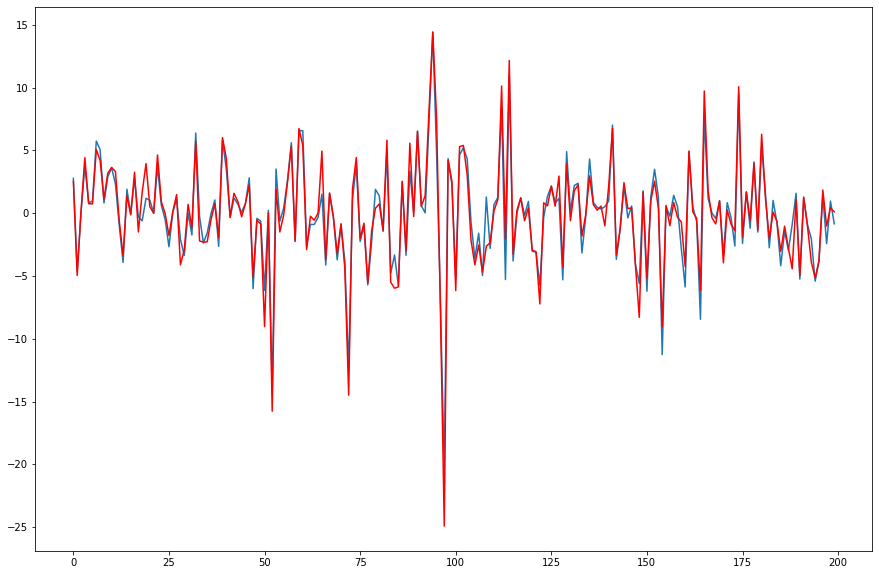

In [9]:
series = pd.Series(train_stock_0)

pyplot.figure(figsize=(15, 10))
series.plot()
pyplot.plot(labels[:,0], color='red')
pyplot.show()

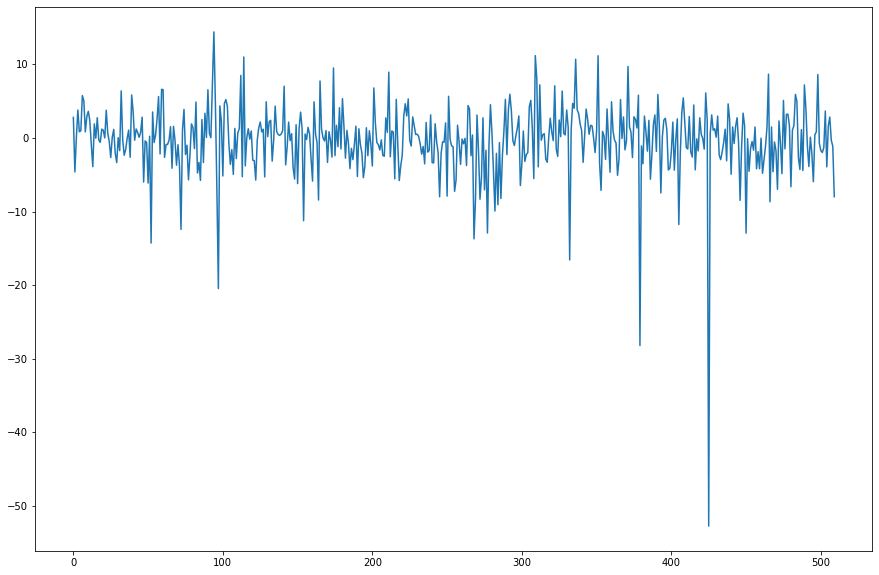

In [10]:
series = pd.Series(stock_0)

pyplot.figure(figsize=(15, 10))
series.plot()
pyplot.show()

In [11]:
train_stock_1 = train_ar[1][:, 54]
train_stock_10 = train_ar[10][:, 54]
train_stock_100 = train_ar[100][:, 54]

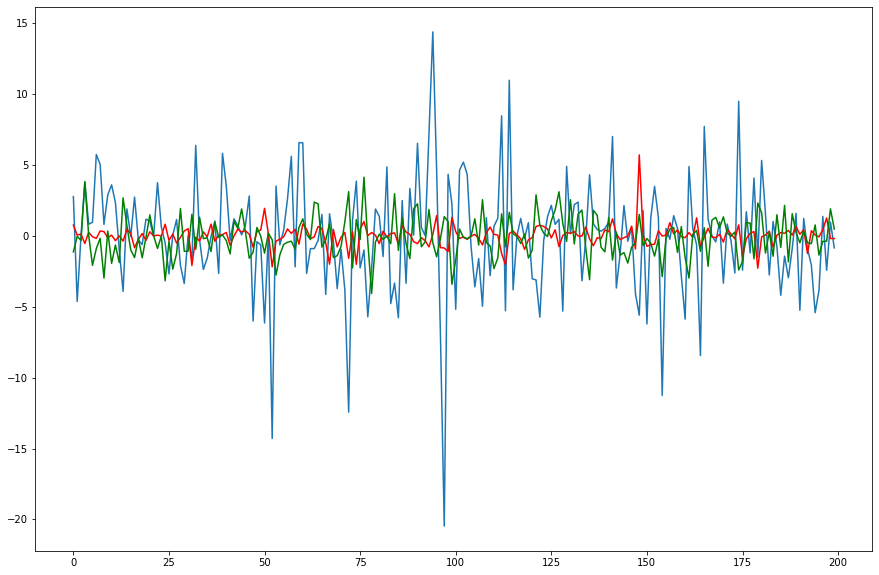

In [12]:
series_0 = pd.Series(train_stock_0)
series_1 = pd.Series(train_stock_1)
series_10 = pd.Series(train_stock_10)
series_100 = pd.Series(train_stock_100)

pyplot.figure(figsize=(15, 10))
pyplot.plot(series_0)
pyplot.plot(series_1, color='red')
pyplot.plot(series_10, color='green')
#pyplot.plot(series_100, color='purple')
pyplot.show()

### AR Model

In [13]:
def draw_acplots(stock, day):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # draw auto correlation plot
    from pandas.plotting import autocorrelation_plot

    pyplot.figure(figsize=(15, 10))
    autocorrelation_plot(series)
    pyplot.show()
    
    # draw acf plot
    from statsmodels.graphics.tsaplots import plot_acf

    plot_acf(series[:-1], lags=10)
    pyplot.show()

In [14]:
def predict_with_ar_model(stock, day, lags):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # do AR regression
    from statsmodels.tsa.ar_model import AutoReg

    X = series.values
    y = labels[day, stock]

    model = AutoReg(X, lags=lags, old_names=False)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(X), end=len(X) + 24, dynamic=False)
    print("prediction - {}, expected - {}".format(predictions[-1], y))
    
    predictions = np.hstack((X[-1], predictions))
    predict_series = pd.Series(data=predictions, index=range(53, 79))
    pyplot.figure(figsize=(20, 10))
    series.plot()
    pyplot.plot(78, y, marker="*", color='red')
    predict_series.plot(marker=".", color='green')
    pyplot.show()

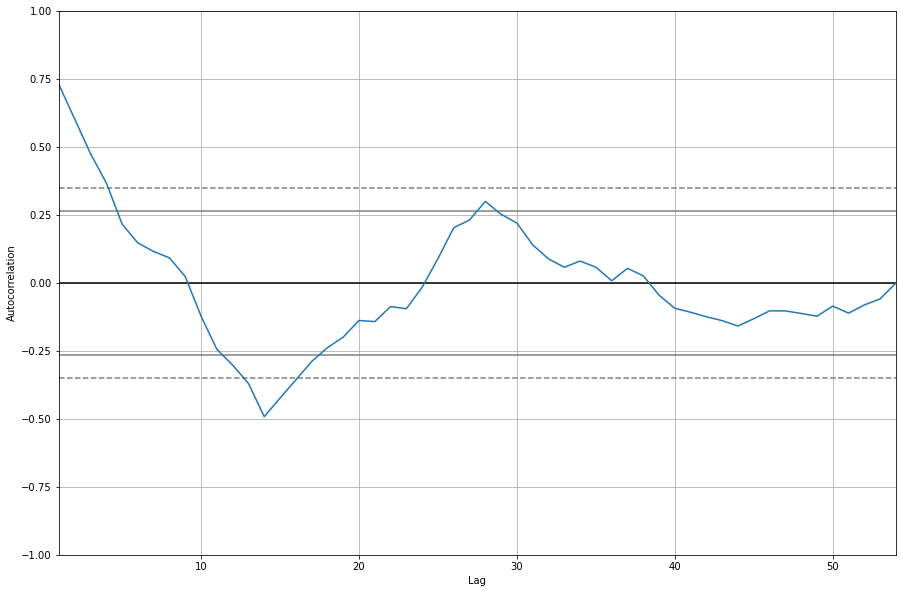

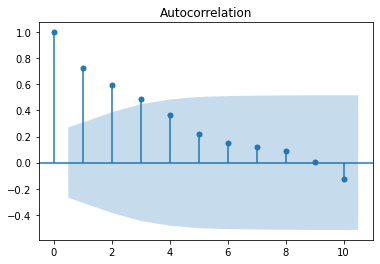

In [15]:
draw_acplots(0, 0)

prediction - 2.4652126217452732, expected - 2.53


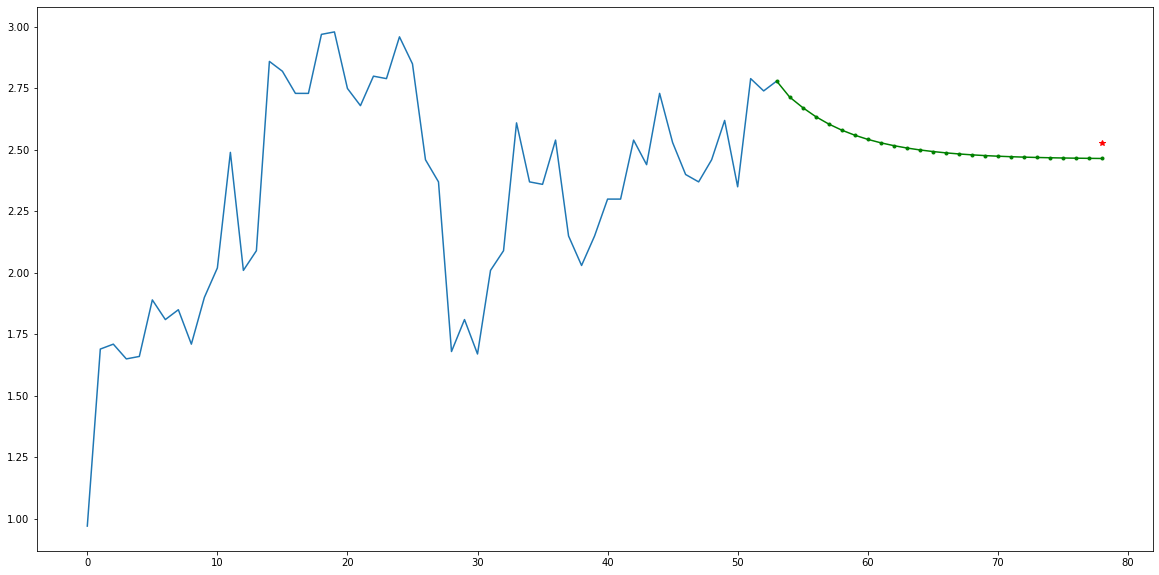

In [16]:
predict_with_ar_model(0, 0, 3)

prediction - 3.7918508033863336, expected - 3.65


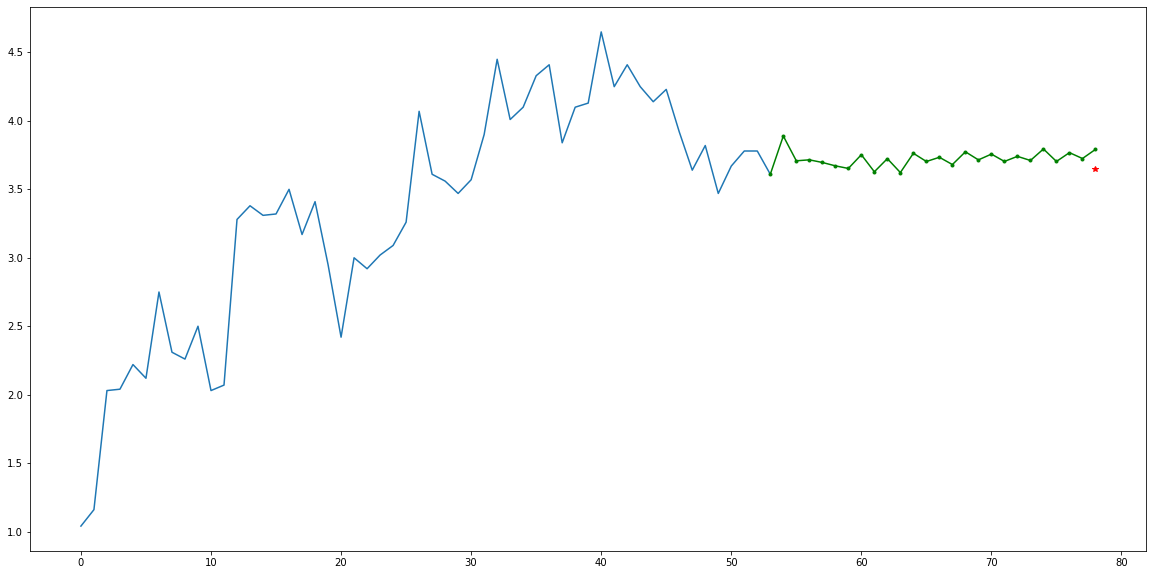

In [17]:
predict_with_ar_model(0, 10, 15)

prediction - -1.8447935335486403, expected - -1.83


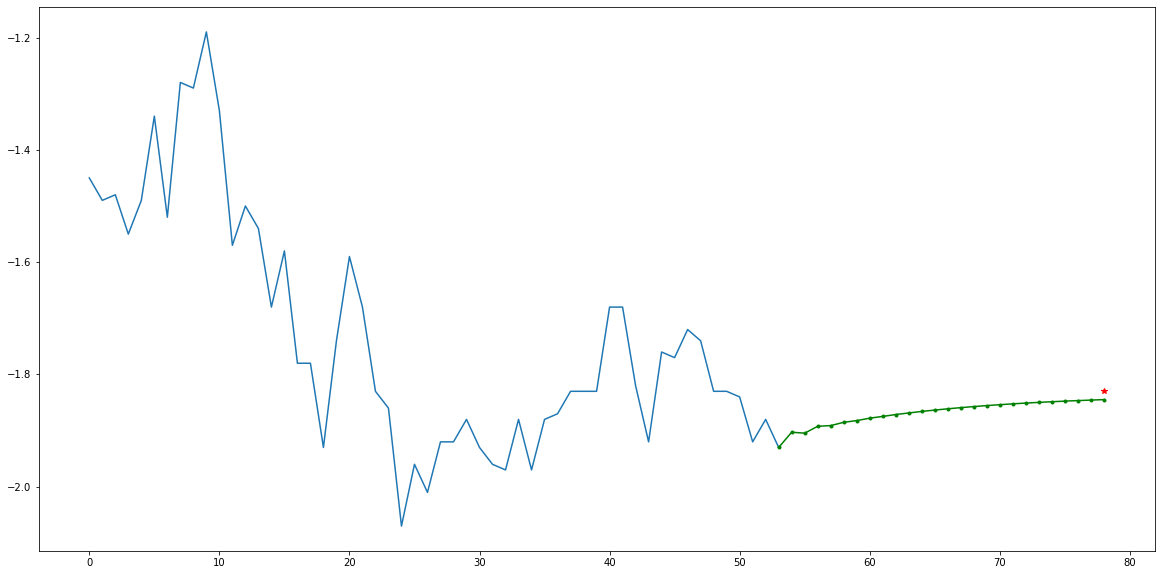

In [18]:
predict_with_ar_model(10, 10, 4)

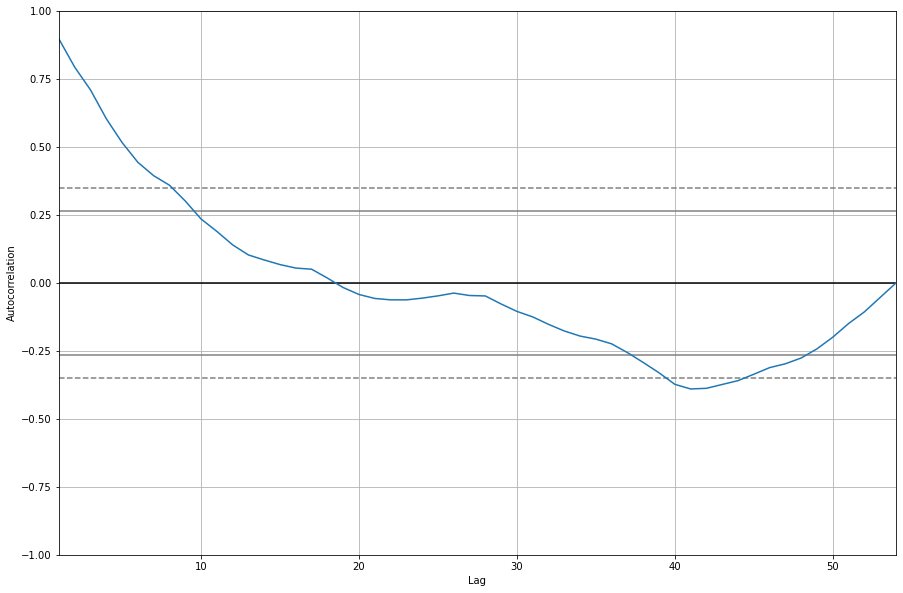

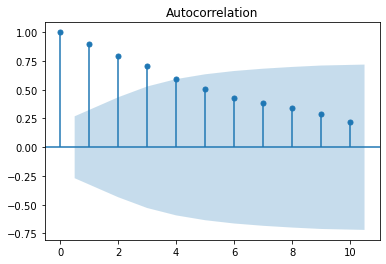

In [19]:
draw_acplots(190, 180)

prediction - 0.6828638801072505, expected - 0.83


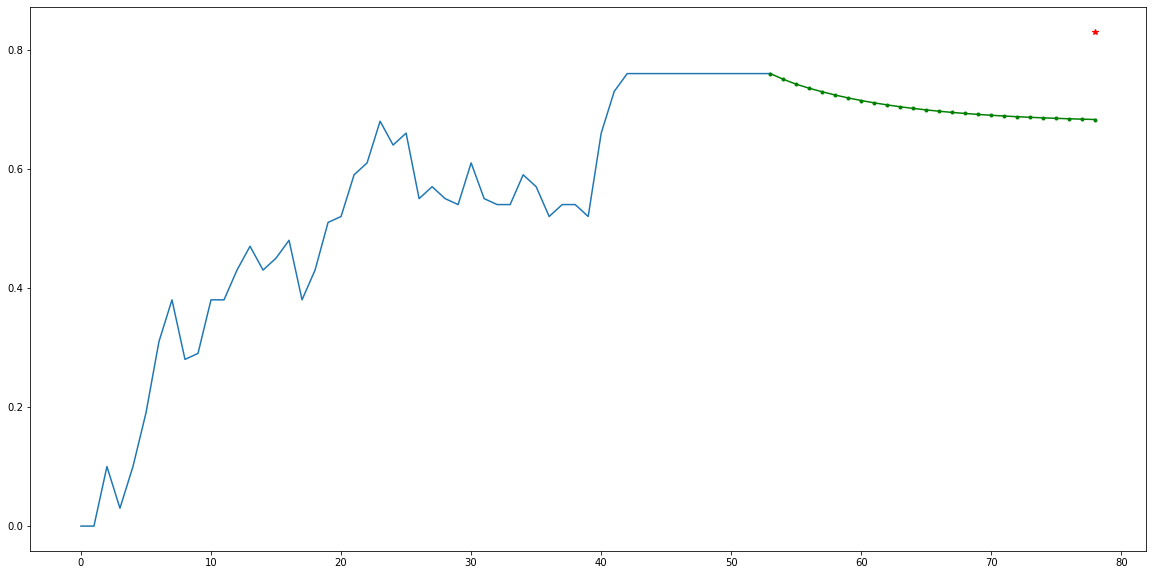

In [20]:
predict_with_ar_model(190, 180, 4)

In [21]:
def predict_with_ar_model_without_plot(stock, day, lags):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # do AR regression
    from statsmodels.tsa.ar_model import AutoReg

    X = series.values
    y = labels[day, stock]

    model = AutoReg(X, lags=lags, old_names=False)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(X), end=len(X) + 24, dynamic=False)
    
    return predictions[-1]

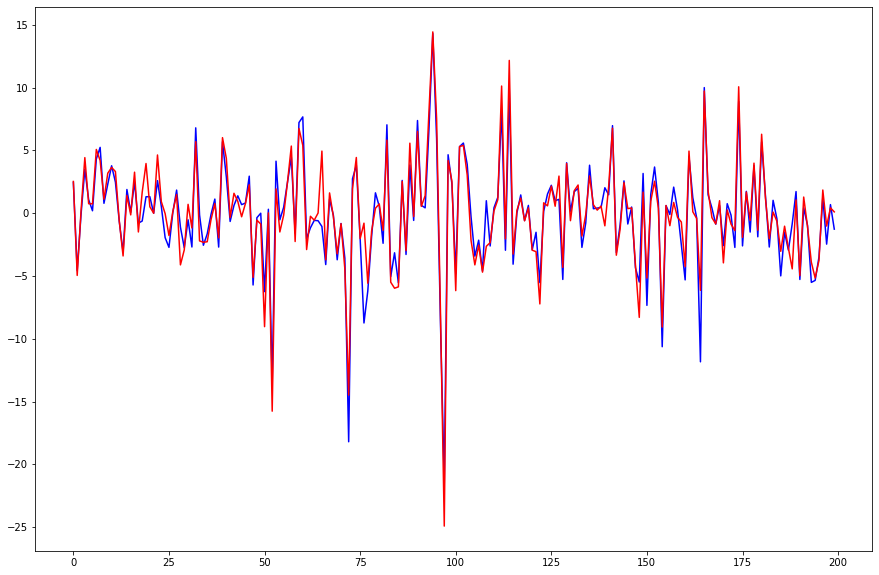

In [22]:
predictions = list()
for x in range(200):
    predictions.append(predict_with_ar_model_without_plot(0, x, 4))

pyplot.figure(figsize=(15, 10))
pyplot.plot(predictions, color='blue')
pyplot.plot(labels[:, 0], color='red')
pyplot.show()

In [23]:
predictions_with_ar = predictions

In [24]:
def predict_with_updated_ar_model(stock, day, lags):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # do AR regression
    from statsmodels.tsa.ar_model import AutoReg

    X = series.values
    y = labels[day, stock]
    window = lags

    model = AutoReg(X, lags=lags, old_names=False)
    model_fit = model.fit()
    coef = model_fit.params
    
    history = X[len(X) - window:]
    history = [history[i] for i in range(len(history))]
    
    predictions = list()
    for t in range(25):
        length = len(history)
        lag = [history[i] for i in range(length - window, length)]
        prediction = coef[0]
        for d in range(window):
            prediction += coef[d + 1] * lag[window - d - 1]
        predictions.append(prediction)
        history.append(prediction)
    print("prediction - {}, expected - {}".format(predictions[-1], y))
    
    predictions = np.hstack((X[-1], predictions))
    predict_series = pd.Series(data=predictions, index=range(53, 79))
    pyplot.figure(figsize=(20, 10))
    series.plot()
    pyplot.plot(78, y, marker="*", color='red')
    predict_series.plot(marker=".", color='green')
    pyplot.show()

prediction - 0.6828638801072509, expected - 0.83


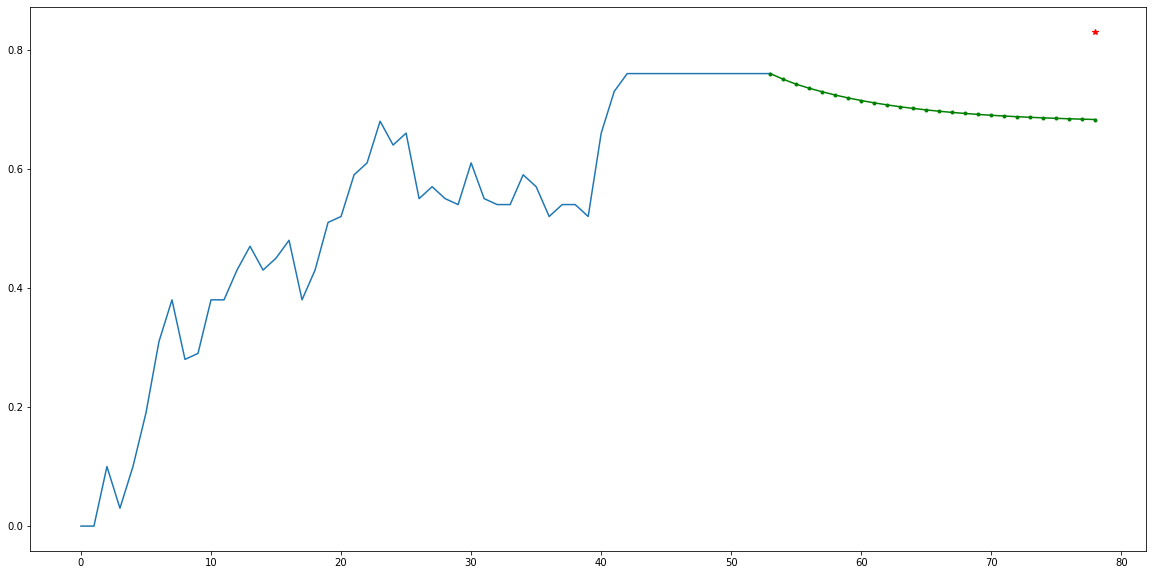

In [25]:
predict_with_updated_ar_model(190, 180, 4)

In [26]:
import warnings

warnings.filterwarnings('ignore')

In [27]:
def predict_with_arima_model(stock, day, ar, ma):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # do AR regression
    from statsmodels.tsa.arima.model import ARIMA

    X = series.values
    y = labels[day, stock]

    history = [x for x in X]
    predictions = list()
    
    for x in range(25):
        model = ARIMA(history, order=(ar, 1, ma))
        model_fit = model.fit()
        prediction = model_fit.forecast()[0]
        predictions.append(prediction)
        history.append(prediction)
    print("prediction - {}, expected - {}".format(predictions[-1], y))
    
    predictions = np.hstack((X[-1], predictions))
    predict_series = pd.Series(data=predictions, index=range(53, 79))
    pyplot.figure(figsize=(20, 10))
    series.plot()
    pyplot.plot(78, y, marker="*", color='red')
    predict_series.plot(marker=".", color='green')
    pyplot.show()

prediction - 0.76, expected - 0.83


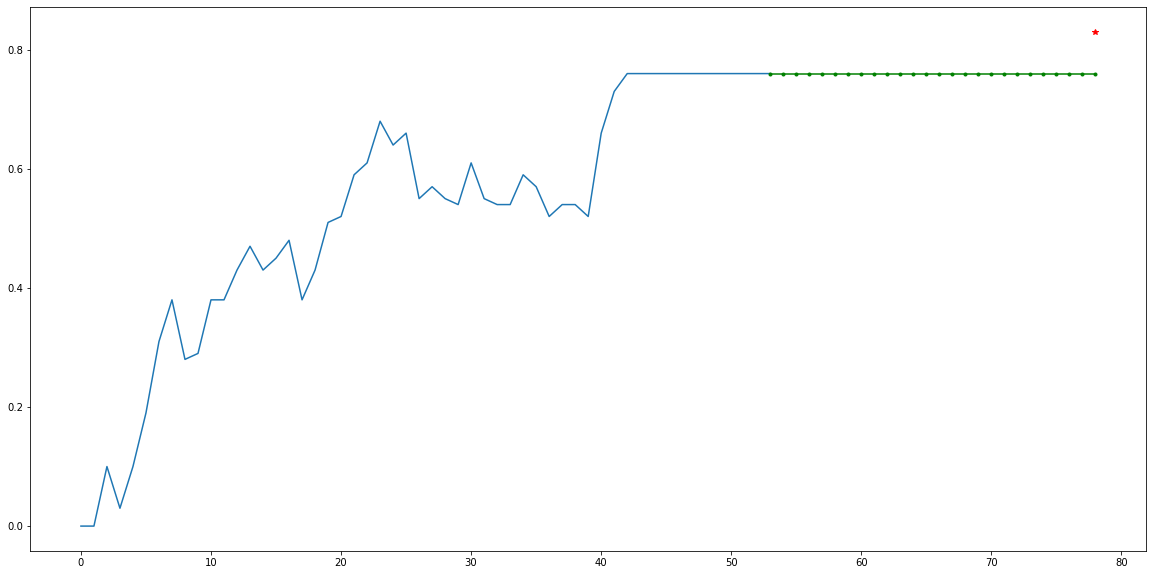

In [28]:
predict_with_arima_model(190, 180, 4, 0)

prediction - 0.8986416935865386, expected - 0.83


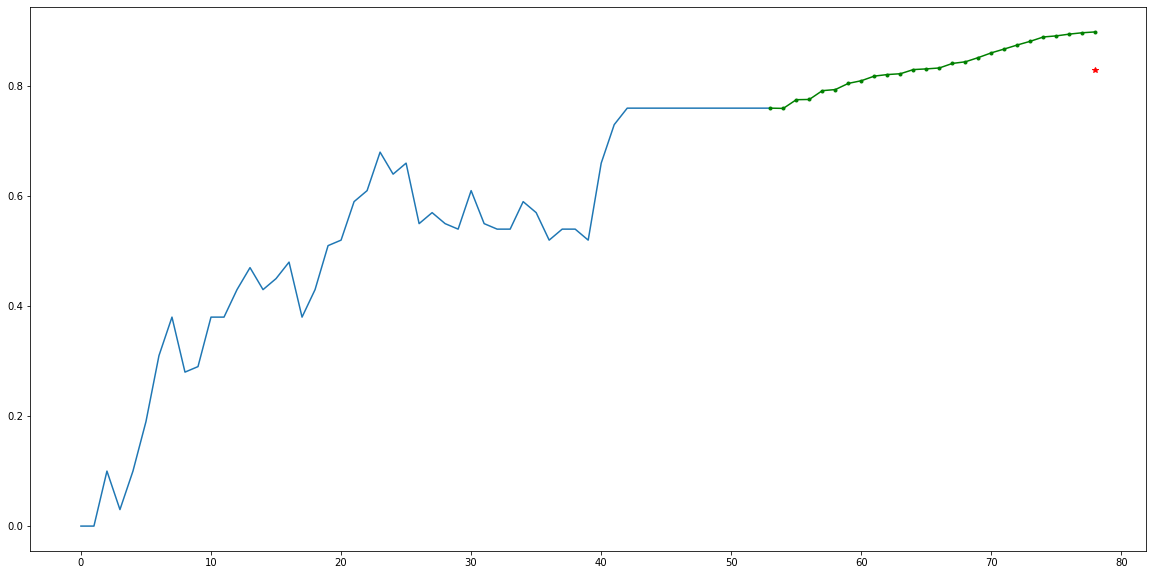

In [29]:
predict_with_arima_model(190, 180, 4, 2)

prediction - 0.9714918303162252, expected - 0.83


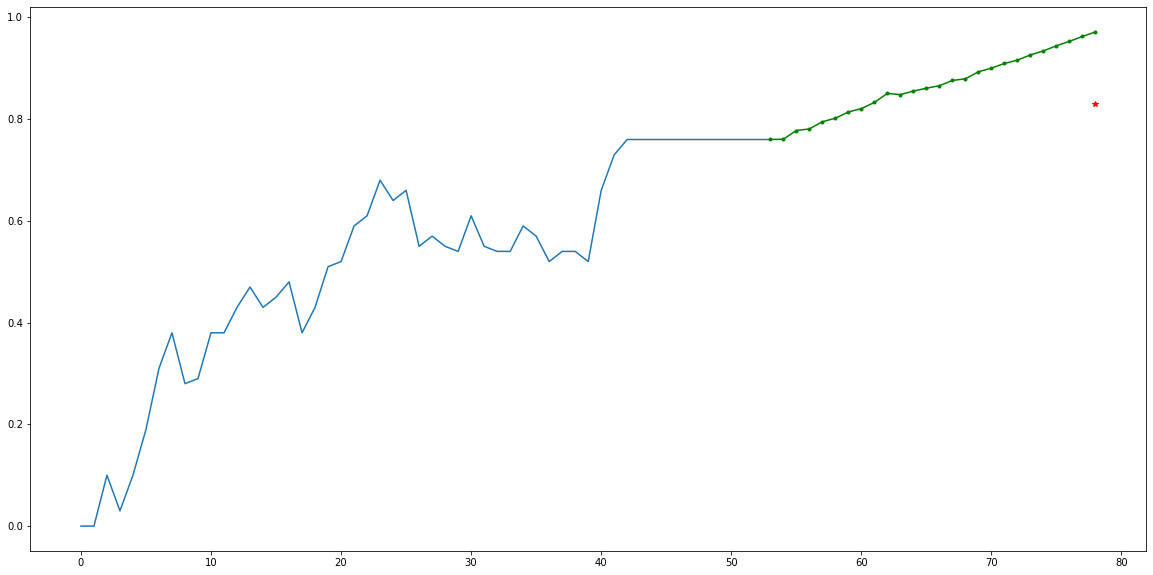

In [30]:
predict_with_arima_model(190, 180, 4, 4)

In [66]:
def predict_with_arima_model_without_plot(stock, day, ar, ma):
    train_stock_within_day = train_ar[stock][day, 1:]
    series = pd.Series(train_stock_within_day)
    
    # do AR regression
    from statsmodels.tsa.arima.model import ARIMA

    X = series.values
    y = labels[day, stock]

    history = [x for x in X]
    predictions = list()
    
    for x in range(25):
        model = ARIMA(history, order=(ar, 1, ma))
        model_fit = model.fit()
        prediction = model_fit.forecast()[0]
        predictions.append(prediction)
        history.append(prediction)

    return predictions[-1]    

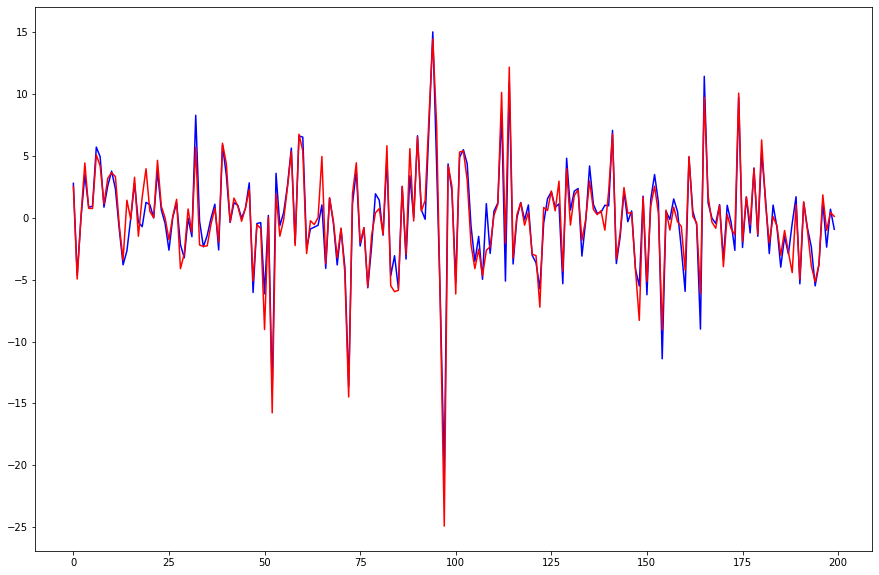

In [68]:
predictions = list()
for x in range(200):
    predictions.append(predict_with_arima_model_without_plot(0, x, 4, 1))

pyplot.figure(figsize=(15, 10))
pyplot.plot(predictions, color='blue')
pyplot.plot(labels[:, 0], color='red')
pyplot.show()

In [69]:
predictions_with_arima = predictions

### Linear Model

In [31]:
train_last = [train[x][54, :] for x in range(len(train))]
test_last = [test[x][54, :] for x in range(len(test))]

In [32]:
print(type(train_last[0]))
print(train_last[0].shape)

<class 'numpy.ndarray'>
(442,)


In [33]:
df = pd.DataFrame(train_last)
df

,0,1,2,3,4,5,6,7,8,9,...,432,433,434,435,436,437,438,439,440,441
0,2.78,0.77,0.10,0.09,-0.14,0.77,1.33,1.51,1.72,1.05,...,0.500000,0.758230,0.706056,0.798869,0.109697,0.194109,0.040000,0.259782,0.121326,0.124544
1,-4.62,0.06,-0.22,-0.04,-0.81,0.66,0.88,0.70,0.82,0.58,...,0.355662,0.490292,0.534405,0.659364,0.090437,0.176633,0.023094,0.225328,0.048442,0.083666
2,0.02,0.13,0.18,-0.12,-0.04,0.42,0.33,0.03,0.26,-0.11,...,0.281782,0.619862,0.595300,0.555556,0.081054,0.077272,0.030551,0.174681,0.061210,0.060000
3,3.79,-0.53,-0.22,-0.21,-0.61,-0.27,3.16,0.84,0.05,2.00,...,0.323910,0.661859,0.186396,0.244135,0.164887,0.262329,0.075719,0.288960,0.098319,0.128106
4,0.83,0.25,0.08,0.07,-0.18,0.14,-0.47,0.57,-0.05,0.10,...,0.355662,0.130888,0.191393,0.211461,0.080660,0.082128,0.034641,0.125018,0.043205,0.088569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-3.84,-0.06,0.00,0.11,-0.31,0.26,-1.04,-0.94,-0.26,-0.74,...,0.355662,0.240161,0.486932,0.597484,0.172855,0.347036,0.046188,0.420934,0.063770,0.176667
196,1.38,0.44,0.12,-0.11,0.40,0.30,0.94,0.90,0.88,0.89,...,0.430662,0.767052,0.309020,0.402862,0.163039,0.465480,0.072111,0.486796,0.117813,0.160139
197,-2.42,1.27,0.53,0.01,1.01,0.83,1.09,1.73,1.67,1.62,...,0.211325,0.501683,0.179962,0.084905,0.149454,0.146017,0.080829,0.185629,0.059889,0.054874
198,0.97,-0.18,-0.04,0.29,-0.24,-0.21,-0.60,0.19,-0.67,1.70,...,0.533113,0.648988,0.455243,0.571507,0.289932,0.259944,0.050332,0.298542,0.037238,0.132077


In [34]:
columns = df.columns
to_select_columns = [columns[0]] + [_ for _ in columns[198:]]

X = df[to_select_columns]
y = labels[:, 0]

In [35]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=5)
rfe = rfe.fit(X, y)

Selected_Features_Support = list(rfe.support_)
Selected_Features_rank = list(rfe.ranking_)

In [36]:
final_columns = [column for column, selected in zip(to_select_columns, Selected_Features_Support) if selected]
final_columns = [0] + final_columns
print(final_columns)

[0, 225, 293, 295, 296, 297]


In [45]:
X = df[final_columns]
y = labels[:, 0]
yy = y - X[0]

In [46]:
model = LinearRegression()

In [52]:
from sklearn.model_selection import KFold

n_folds = 6
sk = KFold(n_folds)
sk.get_n_splits(X, yy)

predictions = np.zeros(len(yy))

for train_idx, test_idx in sk.split(X, yy):
    train_X, test_X = X.iloc[train_idx].values, X.iloc[test_idx].values
    train_y, test_y = yy[train_idx], yy[test_idx]
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    predictions[test_idx] = prediction + test_X[:, 0]

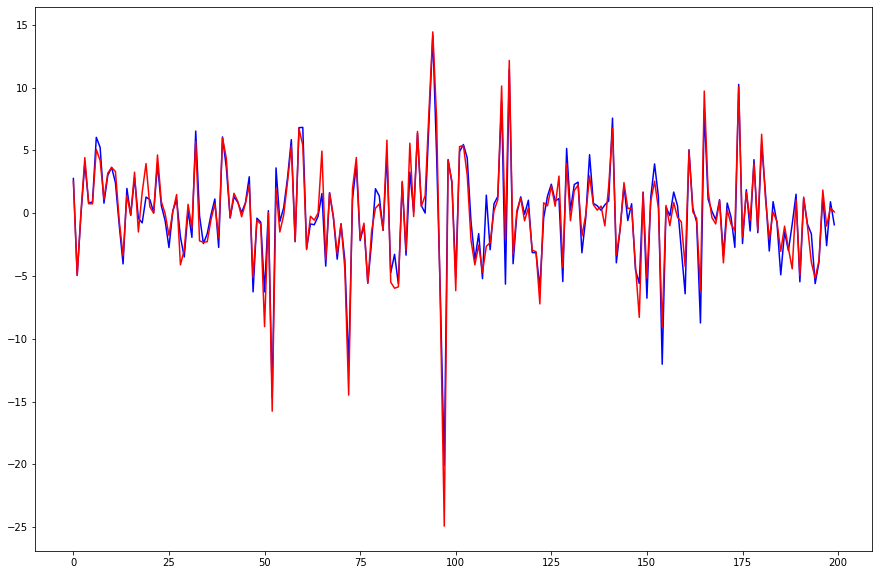

In [53]:
pyplot.figure(figsize=(15, 10))
pyplot.plot(predictions, color='blue')
pyplot.plot(labels[:, 0], color='red')
pyplot.show()

In [54]:
predictions_with_linr = predictions

In [58]:
X = df[final_columns]
y = labels[:, 0]

In [59]:
from sklearn.model_selection import KFold

n_folds = 6
sk = KFold(n_folds)
sk.get_n_splits(X, y)

predictions = np.zeros(len(y))

for train_idx, test_idx in sk.split(X, y):
    train_X, test_X = X.iloc[train_idx].values, X.iloc[test_idx].values
    train_y, test_y = y[train_idx], y[test_idx]
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    predictions[test_idx] = prediction

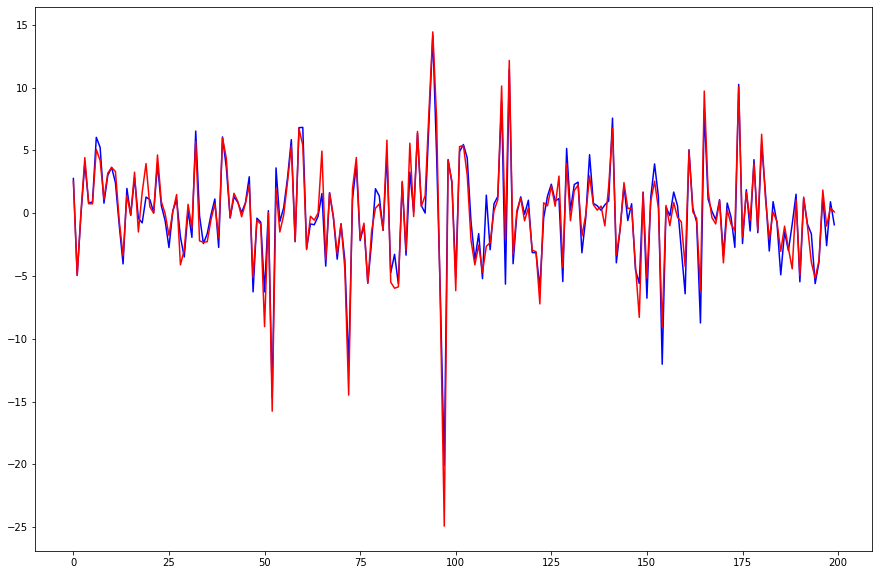

In [60]:
pyplot.figure(figsize=(15, 10))
pyplot.plot(predictions, color='blue')
pyplot.plot(labels[:, 0], color='red')
pyplot.show()

In [61]:
predictions_with_linr_for_diff = predictions

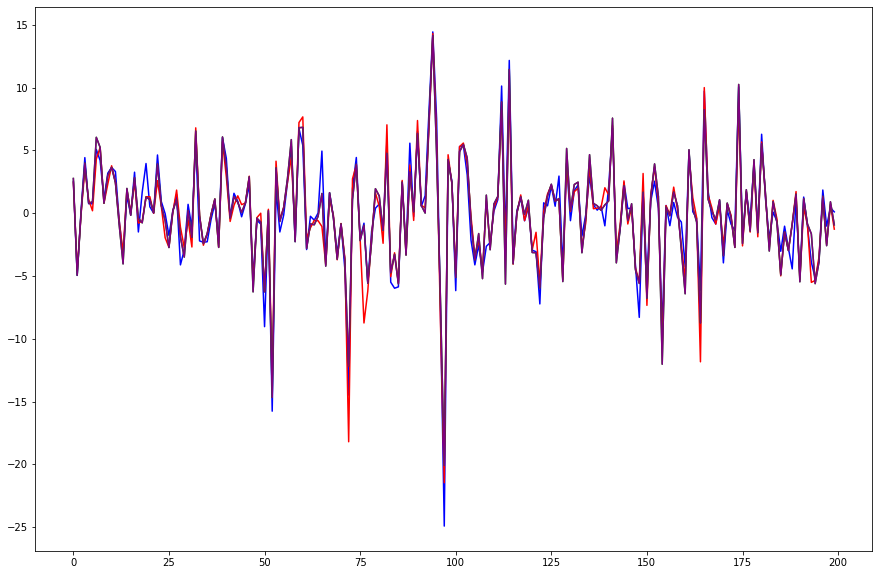

In [62]:
pyplot.figure(figsize=(15, 10))
pyplot.plot(labels[:, 0], color='blue')
pyplot.plot(predictions_with_ar, color='red')
pyplot.plot(predictions_with_linr, color='green')
pyplot.plot(predictions_with_linr_for_diff, color='purple')
pyplot.show()

### Summary

In [70]:
for x in range(len(train)):
    print("predict with ar - {:0.3f}, predict with arima - {:0.3f}, predict with linr - {:0.3f}, predict with linr for diff - {:0.3f}, expected - {:0.3f}".format(predictions_with_ar[x], predictions_with_arima[x], predictions_with_linr[x], predictions_with_linr_for_diff[x], y[x]))

predict with ar - 2.462, predict with arima - 2.779, predict with linr - 2.766, predict with linr for diff - 2.766, expected - 2.530
predict with ar - -4.564, predict with arima - -4.625, predict with linr - -4.939, predict with linr for diff - -4.939, expected - -4.950
predict with ar - -0.123, predict with arima - 0.019, predict with linr - -0.037, predict with linr for diff - -0.037, expected - 0.160
predict with ar - 3.510, predict with arima - 3.472, predict with linr - 3.995, predict with linr for diff - 3.995, expected - 4.430
predict with ar - 1.077, predict with arima - 0.857, predict with linr - 0.802, predict with linr for diff - 0.802, expected - 0.760
predict with ar - 0.199, predict with arima - 0.927, predict with linr - 0.909, predict with linr for diff - 0.909, expected - 0.750
predict with ar - 4.318, predict with arima - 5.710, predict with linr - 6.047, predict with linr for diff - 6.047, expected - 5.080
predict with ar - 5.245, predict with arima - 4.931, predict 

In [72]:
from sklearn.metrics import mean_squared_error

ar_mse = mean_squared_error(y, predictions_with_ar)
arima_mse = mean_squared_error(y, predictions_with_arima)
linr_mse = mean_squared_error(y, predictions_with_linr)
linr_for_diff_mse = mean_squared_error(y, predictions_with_linr_for_diff)

print("ar mse - {}, arima_mse - {}, linr mse - {}, linr for diff mse - {}".format(ar_mse, arima_mse, linr_mse, linr_for_diff_mse))

ar mse - 1.9167418220477308, arima_mse - 1.3263867820721646, linr mse - 1.307458001988142, linr for diff mse - 1.3074580019881412


In [73]:
from sklearn.metrics import mean_absolute_error

ar_mae = mean_absolute_error(y, predictions_with_ar)
arima_mae = mean_absolute_error(y, predictions_with_arima)
linr_mae = mean_absolute_error(y, predictions_with_linr)
linr_for_diff_mae = mean_absolute_error(y, predictions_with_linr_for_diff)

print("ar mae - {}, arima_mae - {}, linr mae - {}, linr for diff mae - {}".format(ar_mae, arima_mae, linr_mae, linr_for_diff_mae))

ar mae - 0.9021675113413332, arima_mae - 0.7749781967587053, linr mae - 0.7815418609611965, linr for diff mae - 0.7815418609611965


prediction - 2.7663978562732994, expected - 2.53
prediction - -4.939263411909623, expected - -4.95
prediction - -0.03735267097894568, expected - 0.16
prediction - 3.9950909741937206, expected - 4.43
prediction - 0.8015550614933072, expected - 0.76
prediction - 0.9085912114408478, expected - 0.75
prediction - 6.046951883805908, expected - 5.08
prediction - 5.241746856038362, expected - 4.2
prediction - 0.801966708516263, expected - 1.12
prediction - 3.02260299709677, expected - 3.19
prediction - 3.652084342706831, expected - 3.65
prediction - 2.4426343472043004, expected - 3.32
prediction - -0.9642230477743955, expected - -0.6
prediction - -4.032119706521453, expected - -3.4
prediction - 1.976347453255718, expected - 1.42
prediction - -0.1642885250646519, expected - -0.13
prediction - 2.8391494320886728, expected - 3.27
prediction - -0.3992761667274914, expected - -1.49
prediction - -0.7621486052098851, expected - 1.67
prediction - 1.2876787759865476, expected - 3.96
prediction - 1.0948